In [ ]:
import pandas as pd

In [ ]:
Books_df  = pd.read_csv("/content/Books.csv")
Books_df.head()

<ipython-input-98-1bc29ab8e847>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  Books_df  = pd.read_csv("/content/Books.csv")


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
users_df = pd.read_csv("/content/Users.csv")
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
ratings_df = pd.read_csv("/content/Ratings.csv")
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
users_df.shape


(278858, 3)

In [ ]:
Books_df.shape


(271360, 8)

In [ ]:
ratings_df.shape

(1149780, 3)

In [ ]:
ratings_Books = ratings_df.merge(Books_df,on="ISBN")
ratings_Books.head(1)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [ ]:
Num_of_Ratings= ratings_Books.groupby("Book-Title").count()["Book-Rating"].reset_index()

In [ ]:
Num_of_Ratings.rename(columns={"Book-Rating":"Num-of-Ratings"},inplace= True)

In [ ]:
Num_of_Ratings.head(1)

,Book-Title,Num-of-Ratings
0,A Light in the Storm: The Civil War Diary of ...,4


In [ ]:
avg_of_Ratings= ratings_Books.groupby("Book-Title").mean(numeric_only = True)["Book-Rating"].reset_index()
avg_of_Ratings.rename(columns={"Book-Rating":"avg-of-Ratings"},inplace= True)

In [ ]:
avg_of_Ratings.head()

,Book-Title,avg-of-Ratings
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


In [ ]:
popularBooks_df= Num_of_Ratings.merge(avg_of_Ratings,on="Book-Title")
popularBooks_df.head(1)

,Book-Title,Num-of-Ratings,avg-of-Ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.25


In [ ]:
popularBooks_df= popularBooks_df[popularBooks_df["Num-of-Ratings"]>=300].sort_values("avg-of-Ratings",ascending=False).head(20)

In [ ]:
popularBooks_df

,Book-Title,Num-of-Ratings,avg-of-Ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
219741,To Kill a Mockingbird,510,4.700000
183573,The Da Vinci Code,898,4.642539
187880,The Five People You Meet in Heaven,430,4.551163
180556,The Catcher in the Rye,449,4.545657


In [ ]:
Popular_Books= popularBooks_df.merge(Books_df,on="Book-Title").drop_duplicates("Book-Title")[["Book-Title","Book-Author","Image-URL-M","Num-of-Ratings","avg-of-Ratings"]].reset_index()

In [ ]:
Popular_Books.drop(columns=["index"],inplace=True)

In [ ]:
Popular_Books

,Book-Title,Book-Author,Image-URL-M,Num-of-Ratings,avg-of-Ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
1,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
2,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
3,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
4,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
5,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
6,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000
7,The Da Vinci Code,Dan Brown,http://images.amazon.com/images/P/0385504209.0...,898,4.642539
8,The Five People You Meet in Heaven,Mitch Albom,http://images.amazon.com/images/P/0786868716.0...,430,4.551163
9,The Catcher in the Rye,J.D. Salinger,http://images.amazon.com/images/P/0316769487.0...,449,4.545657


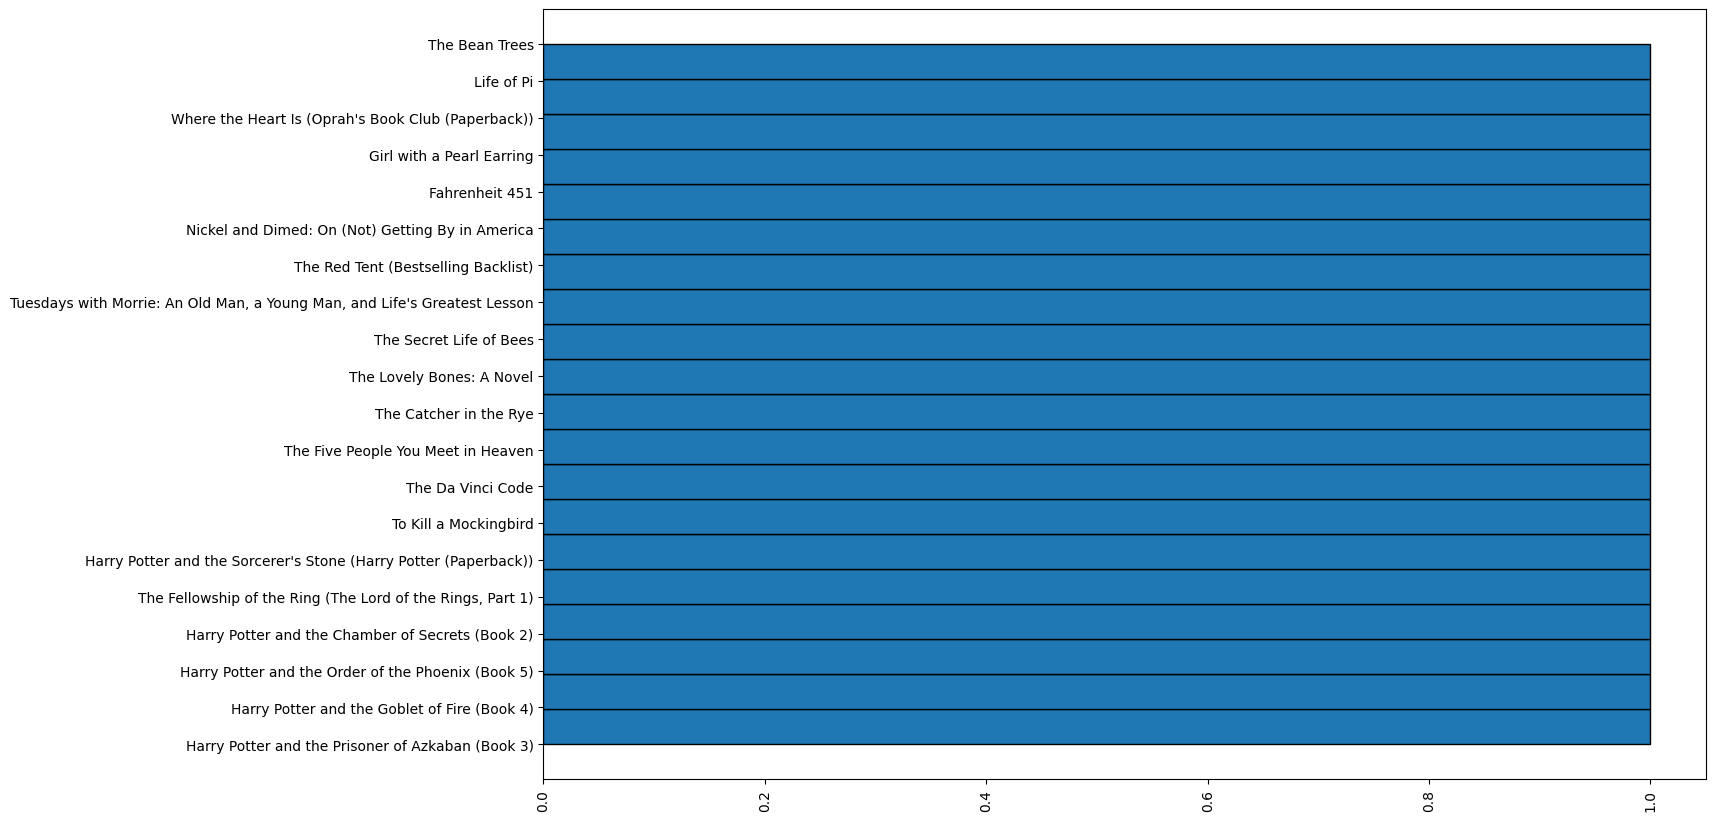

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

plt.hist(Popular_Books["Book-Title"],bins=20, edgecolor='black',orientation='horizontal')
plt.xticks(rotation=90)
plt.show()

